In [251]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [252]:
## Importing the necessary libraries for our work

In [253]:
## So from our previous work, we take the dataset

In [254]:
X_train = np.array([2600, 3000, 3200, 3600, 4000])
y_train = np.array([550000, 565000, 610000, 680000, 725000])

In [255]:
## X_train -> Size of the house in sq feet
## y_train -> Labels for the price of the house

### Gradient descent -> Optimization algorithm to adjust the values of w and b, to minimize the cost function

Cost Function : $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \big( f(x^{(i)}) - y^{(i)} \big)^2 $$

In [256]:
def compute_cost(X_train, y_train, w, b):

    m = X_train.shape[0] ## Number of training set

    y_pred = w * X_train + b
    total_cost = 0

    for i in range(m):
        total_cost += (y_pred[i] - y_train[i])**2

    total_cost /= (2 * m)
    return total_cost

### Derivatives of weight and bias

$$
\frac{\partial J(w, b)}{\partial w} 
= \frac{1}{m} \sum_{i=1}^{m} \big( f(x^{(i)}) - y^{(i)} \big) \cdot x^{(i)}
$$


$$
\frac{\partial J(w, b)}{\partial b} 
= \frac{1}{m} \sum_{i=1}^{m} \big( f(x^{(i)}) - y^{(i)} \big)
$$


### Updating the values of w and b

$$
w := w - \alpha \frac{\partial J(w, b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J(w, b)}{\partial b}
$$


### Here alpha is the learning rate

In [257]:
def compute_derivative(X_train, y_train, w, b):

    m = X_train.shape[0] ## number of training set
    y_pred = w * X_train + b
    d_dw = 0
    d_db = 0
    
    for i in range(m):
        d_dw += (y_pred[i] - y_train[i]) * X_train[i]
        d_db += (y_pred[i] - y_train[i])

    d_dw = d_dw / m
    d_db = d_db / m

    return d_dw , d_db    

In [258]:
compute_derivative(X_train, y_train, 135, 18000)

(np.float64(-542040000.0), np.float64(-165200.0))

In [259]:
def gradient_descent(X_train, y_train, w, b, alpha, iteration):

    m = X_train.shape[0] ## training set

    total_cost = compute_cost(X_train, y_train, w, b)
    d_dw, d_db = compute_derivative(X_train, y_train, w, b)

    w = w - alpha * d_dw
    b = b - alpha * d_db

    return iteration, total_cost, w, b

In [260]:
## initialize the variables

In [261]:
alpha = 0.005
w = 0
b = 0
iterations = 8000

In [262]:
## scaling the features
X_train = X_train / 1000
y_train = y_train / 1000

In [263]:
## Checking for 1000 iterations the result
iteration_num = []
costs = []
weights = []
bias = []
for i in range(iterations):    
    iteration, total_cost, w, b = gradient_descent(X_train, y_train, w, b, alpha, i)
    iteration_num.append(iteration)
    costs.append(total_cost)
    weights.append(w)
    bias.append(b)

In [264]:
## Setting the dataframe for visualization
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.DataFrame(iteration_num , columns = ['iterations'])
df['costs'] = costs
df['w'] = weights
df['b'] = bias

### Plotting Cost w.r.t to weight

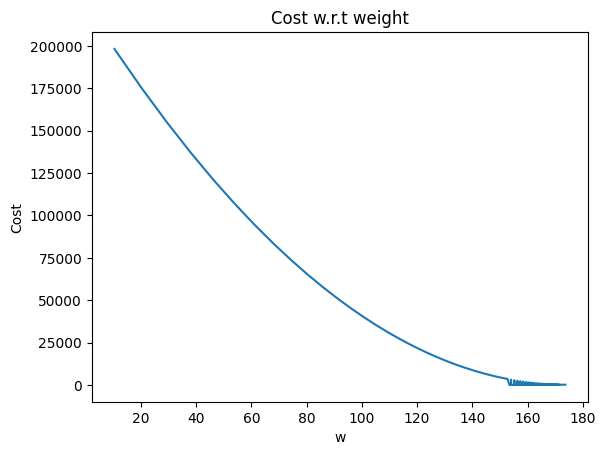

In [265]:
fig, ax = plt.subplots()
ax.set_title('Cost w.r.t weight')
sns.lineplot(x = 'w', y = 'costs', data = df)
ax.set_xlabel('w')
ax.set_ylabel('Cost')
plt.show()

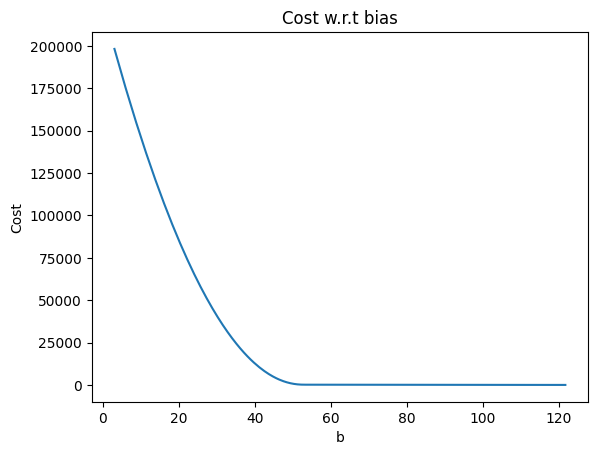

In [266]:
fig, ax = plt.subplots()
ax.set_title('Cost w.r.t bias')
sns.lineplot(x = 'b', y = 'costs', data = df)
ax.set_xlabel('b')
ax.set_ylabel('Cost')
plt.show()

### From both the graph, we see that both w and b are converging, means cost is reducing to zero after every iteration

In [268]:
df[7500: 8000]

,iterations,costs,w,b
7500,7500,134.05,154.27,118.78
7501,7501,134.04,154.27,118.79
7502,7502,134.03,154.27,118.80
7503,7503,134.02,154.27,118.80
7504,7504,134.01,154.26,118.81
...,...,...,...,...
7995,7995,130.31,153.40,121.70
7996,7996,130.30,153.40,121.71
7997,7997,130.29,153.40,121.71
7998,7998,130.28,153.39,121.72


In [269]:
### From above we see that we can keep w = 153.39 and b = 121

In [270]:
X_train[0]

np.float64(2.6)

In [271]:
y_train[0]

np.float64(550.0)

In [272]:
153.39 * X_train[0] + 121

np.float64(519.814)

## See we predicted 519, when out actual is 550

## Not Bad !!